In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchsummary import summary
import torch.utils as utils
from torchvision.ops.roi_align import RoIAlign
import numpy as np
import torchvision.transforms as transforms
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json
import pandas as pd
import cv2
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from tqdm import tqdm
import shutil
from xml.dom import minidom
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
from sklearn.feature_extraction.image import extract_patches_2d
from skimage.draw import polygon
from scipy.io import savemat
import torch.utils.data
from PIL import Image
from pathlib import Path
import sklearn

In [ ]:

torch.seed()
from google.colab import drive
drive.mount('/content/drive')


os.chdir('/content/drive/My Drive/MoNuSegTrainingData/')

ROOT_DIR = os.path.abspath("../../")
sys.path.append(ROOT_DIR)

# Data Path
TRAIN_PATH_X = 'MoNuSegTrainingData/Data/'
TRAIN_PATH_Y_Binary = 'MoNuSegTrainingData/Binary_masks/'
TRAIN_PATH_Y_Color = 'MoNuSegTrainingData/Color_masks/'
#TEST_PATH = 'Datasets/test/'
Img_height = 250
Img_width  = 250
Img_channel = 3
# Get train and test IDs
train_ids_X = next(os.walk(TRAIN_PATH_X))[2]
train_ids_y_binary = next(os.walk(TRAIN_PATH_Y_Binary))[2]
train_ids_y_color = next(os.walk(TRAIN_PATH_Y_Color))[2]

Img_Train_X = np.zeros((480,Img_height, Img_width, Img_channel), dtype=np.uint8)
Img_Train_Y_Binary = np.zeros((480,36,36),dtype=np.bool)
    #(len(train_ids_y_binary), 228), dtype=np.bool)
Img_Train_Y_Color = np.zeros(
    (len(train_ids_y_color), Img_height, Img_width,Img_channel), dtype=np.uint8)

print('Resizing training images and masks')
for n, id in tqdm(enumerate(train_ids_X), total=len(train_ids_X)):
    path = TRAIN_PATH_X
    path1 = TRAIN_PATH_Y_Binary
    path2 = TRAIN_PATH_Y_Color
    img = imread(path + id)[:, :, :Img_channel]
    kernel  =250
    patch1 = (img[0:kernel, 0:kernel,:])
    patch2 = (img[0:kernel, kernel:500,:])
    patch3 = (img[0:kernel, (kernel+250):750,:])
    patch4 = (img[0:kernel, (kernel+500):1000,:])
    patch5 = (img[kernel:500, 0:kernel,:])
    patch6 = (img[(kernel+250):750, 0:kernel,:])
    patch7 = (img[(kernel+500):1000, 0:kernel,:])
    patch8 = (img[kernel:500, kernel:500,:])
    patch9 = (img[kernel:500, (kernel+250):750,:])
    patch10 = (img[kernel:500, (kernel+500):1000,:])
    patch11 = (img[(kernel+250):750, kernel:500,:])
    patch12 = (img[(kernel+500):1000, kernel:500,:])
    patch13 = (img[(kernel+250):750, (kernel+250):750,:])
    patch14 = (img[(kernel+250):750, (kernel+500):1000,:])
    patch15 = (img[(kernel+500):1000, (kernel+250):750,:])
    patch16 = (img[(kernel+500):1000,(kernel+500):1000,:])
    #print(path1)
    Img_Train_X[16*n] = patch1
    Img_Train_X[16*n  + 1] = patch2
    Img_Train_X[16*n + 2] = patch3
    Img_Train_X[16*n  + 3] = patch4
    Img_Train_X[16*n  + 4] = patch5
    Img_Train_X[16*n  + 5] = patch6
    Img_Train_X[16*n + 6] = patch7
    Img_Train_X[16*n  + 7] =patch8
    Img_Train_X[16*n + 8] = patch9
    Img_Train_X[16*n + 9] = patch10
    Img_Train_X[16*n + 10] = patch11
    Img_Train_X[16*n + 11] = patch12
    Img_Train_X[16*n  + 12] = patch13
    Img_Train_X[16*n + 13] = patch14
    Img_Train_X[16*n  + 14] = patch15
    Img_Train_X[16*n  + 15] = patch16

    #print(len(Img_Train_X))
    #print(img.shape)
    #make_patches_img(img,Img_Train_X,n)
    #img = resize(img, (Img_height, Img_width),
                 #mode='constant', preserve_range=True)
    #Img_Train_X.append(images)  # Fill empty X_train with values from img
#Img_Train_X = torch.cat(Img_Train_X)
for n, id in tqdm(enumerate(train_ids_y_binary), total=len(train_ids_y_binary)):
    mask = imread(path1 + id)[:, :]
    mask = resize(mask, (144, 144),
           mode='constant', preserve_range=True)
    kernel = 36
    patch1 = mask[0:kernel,0:kernel]
    patch2 = mask[0:kernel,kernel:72]
    patch3 = mask[0:kernel,(kernel+36):108]
    patch4 = mask[0:kernel, (kernel+72):144]
    patch5 = mask[kernel:72, 0:kernel]
    patch6 = mask[(kernel+36):108, 0:kernel]
    patch7 = mask[(kernel+72):144, 0:kernel]
    patch8 = mask[kernel:72, kernel:72]
    patch9 = mask[kernel:72, (kernel+36):108]
    patch10 = mask[kernel:72, (kernel+72):144]
    patch11 = mask[(kernel+36):108, kernel:72]
    patch12 = mask[(kernel+72):144, kernel:72]
    patch13 = mask[(kernel+36):108, (kernel+36):108]
    patch14 = mask[(kernel+36):108, (kernel+72):144]
    patch15 = mask[(kernel+72):144, (kernel+36):108]
    patch16 = mask[(kernel+72):144,(kernel+72):144]
    Img_Train_Y_Binary[16*n] = patch1
    Img_Train_Y_Binary[16*n  + 1] = patch2
    Img_Train_Y_Binary[16*n + 2] = patch3
    Img_Train_Y_Binary[16*n  + 3] = patch4
    Img_Train_Y_Binary[16*n  + 4] = patch5
    Img_Train_Y_Binary[16*n  + 5] = patch6
    Img_Train_Y_Binary[16*n + 6] = patch7
    Img_Train_Y_Binary[16*n  + 7] =patch8
    Img_Train_Y_Binary[16*n + 8] = patch9
    Img_Train_Y_Binary[16*n + 9] = patch10
    Img_Train_Y_Binary[16*n + 10] = patch11
    Img_Train_Y_Binary[16*n + 11] = patch12
    Img_Train_Y_Binary[16*n  + 12] = patch13
    Img_Train_Y_Binary[16*n + 13] = patch14
    Img_Train_Y_Binary[16*n  + 14] = patch15
    Img_Train_Y_Binary[16*n  + 15] = patch16

    


Mounted at /content/drive


  0%|          | 0/30 [00:00<?, ?it/s]

Resizing training images and masks


100%|██████████| 30/30 [00:10<00:00,  2.76it/s]


In [ ]:
print(Img_Train_X[0].dtype)

uint8


torch.Size([480, 3, 250, 250])
torch.Size([480, 1, 36, 36])
torch.Size([1, 3, 250, 250])
torch.Size([1, 1, 36, 36])
(250, 250, 3)


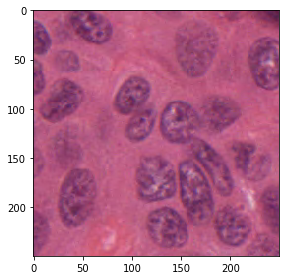

(36, 36)


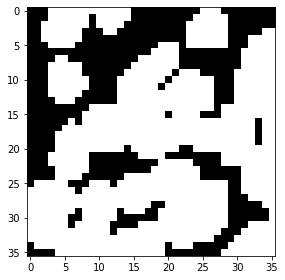

In [ ]:
Input = []
Target = []
for i in range(480):
  x = torch.from_numpy(Img_Train_X[i]).float()
  x = x.view(-1,3,250,250)
  Input.append(x)
  t = torch.from_numpy(Img_Train_Y_Binary[i]).float()
  t = t.view(-1,1,36,36)
  Target.append(t)

Input = torch.cat(Input,dim = 0)
Target = torch.cat(Target,dim = 0)
print(Input.shape)
print(Target.shape)

inputs = torch.from_numpy(Img_Train_X[0])
inputs = inputs.view(-1,3,250,250)
print(inputs.shape)
targets =torch.from_numpy(Img_Train_Y_Binary[0])
targets = targets.view(-1,1,36,36)
print(targets.shape)

#image_x = random.randint(0, len(train_ids_X))
imshow(Img_Train_X[0])
print(Img_Train_X[0].shape)
plt.show()
imshow((Img_Train_Y_Binary[0]))
print(Img_Train_Y_Binary[0].shape)
plt.show()

In [ ]:
#print(Input[:,2:3,:,:].shape)

In [ ]:
class block(nn.Module):
    def __init__(self, in_channels, intermediate_channels, shortcut = None, stride=1):
        super(block, self).__init__()
        self.expand = 4
        self.conv1 = nn.Conv2d(in_channels, intermediate_channels, kernel_size=1, stride=1, padding=0, bias=True)
        self.bn1 = nn.BatchNorm2d(intermediate_channels)
        self.conv2 = nn.Conv2d(intermediate_channels,intermediate_channels,kernel_size=3,stride=stride,padding=1,bias=True)
        self.bn2 = nn.BatchNorm2d(intermediate_channels)
        self.conv3 = nn.Conv2d(intermediate_channels,intermediate_channels * self.expand,kernel_size=1,stride=1,padding=0,bias=True)
        self.bn3 = nn.BatchNorm2d(intermediate_channels * self.expand)
        self.relu = nn.ReLU()
        self.shortcut = shortcut
        self.stride = 1

    def forward(self, x):
        shortcut = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)

        if self.shortcut is not None:
            shortcut = self.shortcut(shortcut)

        x += shortcut
        x = self.relu(x)
        return x


class ResNet_50(nn.Module):
    def __init__(self, block, layers, image_channels):
        super(ResNet_50, self).__init__()
        self.in_channels = 64
        self.layer0 = nn.Sequential(nn.ZeroPad2d(3) , nn.Conv2d(image_channels, 64, kernel_size=7, stride=2,bias=True), nn.BatchNorm2d(64) ,nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

        self.layer1 = self.make_layer(block, layers[0], intermediate_channels=64, stride=1)
        self.layer2 = self.make_layer(block, layers[1], intermediate_channels=128, stride=2)
        self.layer3 = self.make_layer(block, layers[2], intermediate_channels=256, stride=2)
        self.layer4 = self.make_layer(block, layers[3], intermediate_channels=512, stride=2)
        self.conv = nn.Conv2d(2048,1024,kernel_size=1,stride=1,padding=0,bias=True)


    def forward(self, x):
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.conv(x)
        return x

    def stages(self):
        return (self.layer0, self.layer1,self.layer2,self.layer3,self.layer4)

    def make_layer(self, block, num_residual_blocks, intermediate_channels, stride):
        shortcut = None
        layers = []

        if stride != 1 or self.in_channels != intermediate_channels * 4:
            shortcut = nn.Sequential(nn.Conv2d(self.in_channels,intermediate_channels * 4,kernel_size=1,stride=stride,bias=True),nn.BatchNorm2d(intermediate_channels * 4),)

        layers.append(block(self.in_channels, intermediate_channels, shortcut, stride))

        self.in_channels = intermediate_channels * 4

        for i in range(num_residual_blocks - 1):
            layers.append(block(self.in_channels, intermediate_channels))

        return nn.Sequential(*layers)

#model = ResNet_50(block, layers = [3,4,6,3],image_channels=3)
#print(inputs.type(torch.float32).shape)
#output = model.forward(inputs.type(torch.float32))
#output.shape
# from torchsummary import summary
summary(ResNet_50(block, layers = [3,4,6,3],image_channels=3),(3,250,250))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
         ZeroPad2d-1          [-1, 3, 256, 256]               0
            Conv2d-2         [-1, 64, 125, 125]           9,472
       BatchNorm2d-3         [-1, 64, 125, 125]             128
              ReLU-4         [-1, 64, 125, 125]               0
         MaxPool2d-5           [-1, 64, 63, 63]               0
            Conv2d-6           [-1, 64, 63, 63]           4,160
       BatchNorm2d-7           [-1, 64, 63, 63]             128
              ReLU-8           [-1, 64, 63, 63]               0
            Conv2d-9           [-1, 64, 63, 63]          36,928
      BatchNorm2d-10           [-1, 64, 63, 63]             128
             ReLU-11           [-1, 64, 63, 63]               0
           Conv2d-12          [-1, 256, 63, 63]          16,640
      BatchNorm2d-13          [-1, 256, 63, 63]             512
           Conv2d-14          [-1, 256,

In [ ]:
class DenseUnit(nn.Module):
    def __init__(self, in_channels):
        super(DenseUnit, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, 128, kernel_size=1,padding=0, stride=1, bias=True)
        self.bn1 = nn.BatchNorm2d(128)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(128, 32, kernel_size=5,padding=2, stride=1, bias=True)
        self.bn2 = nn.BatchNorm2d(32)

    def forward(self, input):
        print(input.shape)
        out = self.conv1(input)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        input = F.interpolate(input, size=out.shape[2:])
        print(input.shape)
        print(out.shape)
        out = torch.cat([out,input],dim = 1)
        print(out.shape)
        return out

#from torchsummary import summary
#input = torch.tensor([1,512,64,64])
summary(DenseUnit(1024),(1024,64,64))

torch.Size([2, 1024, 64, 64])
torch.Size([2, 1024, 64, 64])
torch.Size([2, 32, 64, 64])
torch.Size([2, 1056, 64, 64])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 64, 64]         131,200
       BatchNorm2d-2          [-1, 128, 64, 64]             256
              ReLU-3          [-1, 128, 64, 64]               0
            Conv2d-4           [-1, 32, 64, 64]         102,432
       BatchNorm2d-5           [-1, 32, 64, 64]              64
              ReLU-6           [-1, 32, 64, 64]               0
Total params: 233,952
Trainable params: 233,952
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 16.00
Forward/backward pass size (MB): 15.00
Params size (MB): 0.89
Estimated Total Size (MB): 31.89
----------------------------------------------------------------


In [ ]:
class Decoder(nn.Module):
    def __init__(self, input_shape, in_channels):
        super(Decoder, self).__init__()
        self.input_shape = input_shape

        self.conv1 = nn.Conv2d(in_channels, 256, kernel_size=5,padding=0, stride=1, bias=True)
        self.dense_block1 = nn.Sequential(DenseUnit(256),
            *[DenseUnit(256 + 32*i) for i in range(1, 8)]
        )
        self.conv2 = nn.Conv2d(256 + 32*8, 512, kernel_size=1,padding=0, stride=1, bias=True)
        self.conv3 = nn.Conv2d(512, 128, kernel_size=5,padding=0, stride=1, bias=True)
        self.dense_block2 = nn.Sequential(DenseUnit(128),
            *[DenseUnit(128 + 32*i) for i in range(1, 4)]
        )
        self.conv4 = nn.Conv2d(128 + 32*4, 128, kernel_size=1,padding=0, stride=1, bias=True)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=5,padding=0, stride=1, bias=False)
        self.conv6 = nn.Conv2d(256, 64, kernel_size=1,padding=0, stride=1, bias=True)

    def forward(self, inputs):
        x = F.interpolate(inputs, scale_factor=2)
        x = self.conv1(x)
        x = self.dense_block1(x)
        x = self.conv2(x)
        x = F.interpolate(x, scale_factor=2)
        x = self.conv3(x)
        x = self.dense_block2(x)
        x = self.conv4(x)
        x = F.interpolate(x, scale_factor=2)
        x = self.conv5(x)
        x = self.conv6(x)

        return x
summary(Decoder((32,32), 1024),(1024,8,8))

torch.Size([2, 256, 12, 12])
torch.Size([2, 256, 12, 12])
torch.Size([2, 32, 12, 12])
torch.Size([2, 288, 12, 12])
torch.Size([2, 288, 12, 12])
torch.Size([2, 288, 12, 12])
torch.Size([2, 32, 12, 12])
torch.Size([2, 320, 12, 12])
torch.Size([2, 320, 12, 12])
torch.Size([2, 320, 12, 12])
torch.Size([2, 32, 12, 12])
torch.Size([2, 352, 12, 12])
torch.Size([2, 352, 12, 12])
torch.Size([2, 352, 12, 12])
torch.Size([2, 32, 12, 12])
torch.Size([2, 384, 12, 12])
torch.Size([2, 384, 12, 12])
torch.Size([2, 384, 12, 12])
torch.Size([2, 32, 12, 12])
torch.Size([2, 416, 12, 12])
torch.Size([2, 416, 12, 12])
torch.Size([2, 416, 12, 12])
torch.Size([2, 32, 12, 12])
torch.Size([2, 448, 12, 12])
torch.Size([2, 448, 12, 12])
torch.Size([2, 448, 12, 12])
torch.Size([2, 32, 12, 12])
torch.Size([2, 480, 12, 12])
torch.Size([2, 480, 12, 12])
torch.Size([2, 480, 12, 12])
torch.Size([2, 32, 12, 12])
torch.Size([2, 512, 12, 12])
torch.Size([2, 128, 20, 20])
torch.Size([2, 128, 20, 20])
torch.Size([2, 32, 20,

In [ ]:
class SegmentationHead(nn.Module):
    def __init__(self, head):
        super(SegmentationHead, self).__init__()
        self.head = head

        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(64, 2, kernel_size=1,padding=0, stride=1, bias=True)

    def forward(self, inputs):
        out = self.bn1(inputs)
        out = self.relu(out)
        out = self.conv1(out)
        if self.head == 'np':
            out = F.softmax(out, dim=1)
            out = torch.max(out, dim=1)[0].unsqueeze(dim=1)
        print(out.shape)
        return out
summary(SegmentationHead(head='np'),(64,36,36))

torch.Size([2, 1, 36, 36])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
       BatchNorm2d-1           [-1, 64, 36, 36]             128
              ReLU-2           [-1, 64, 36, 36]               0
            Conv2d-3            [-1, 2, 36, 36]             130
Total params: 258
Trainable params: 258
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.32
Forward/backward pass size (MB): 1.29
Params size (MB): 0.00
Estimated Total Size (MB): 1.60
----------------------------------------------------------------


In [ ]:
class HoverNet(nn.Module):
    def __init__(self):
        super(HoverNet, self).__init__()
        self.encoder = ResNet_50(block, layers = [3,4,6,3],image_channels=3)     
        self.decoder_np = Decoder((8, 8), 1024)
        self.decoder_hv = Decoder((8, 8), 1024)
        self.head_np = SegmentationHead(head='np')
        self.head_hv = SegmentationHead(head='hv')
    def forward(self, inputs):
        x = self.encoder(inputs)
        out_np = self.decoder_np(x)
        out_hv = self.decoder_hv(x)
        out_np = self.head_np(out_np)
        out_hv = self.head_hv(out_hv)

        return out_np, out_hv


#model = HoverNet()

#np,hv = model.forward(input.type(torch.float32))

In [ ]:
def get_sobel_filters(size: int):
  assert size % 2 == 1, "Size must be odd"

  h_range = torch.arange(-size//2 + 1, size//2 + 1, dtype=torch.float32)
  v_range = torch.arange(-size//2 + 1, size//2 + 1, dtype=torch.float32)
  h, v = torch.meshgrid([h_range, v_range])
  h, v = h.transpose(0, 1), v.transpose(0, 1)

  kernel_h = h / (h*h + v*v + 1e-15)
  kernel_v = v / (h*h + v*v + 1e-15)

  return kernel_h, kernel_v


def get_gradient_hv(preds: torch.Tensor,h_ch: int = 1,v_ch: int = 0):
  mh, mv = get_sobel_filters(size=5)
  mh = mh.reshape(shape=(1, 1, 5, 5))
  mv = mv.reshape(shape=(1, 1, 5, 5))

  hl = preds.view(1,1,-1,1)#[..., h_ch].unsqueeze(dim=-1)
  vl = preds.view(1,1,-1,1)#[..., v_ch].unsqueeze(dim=-1)
  print(hl.shape,vl.shape,mh.shape,mv.shape)
  dh = F.conv2d(hl, mh, stride=1, padding=2)
  dv = F.conv2d(vl, mv, stride=1, padding=2)

  return dh, dv

#grds_v,grds_h = get_gradient_hv(hv,1,0)

In [ ]:
class HoverLoss(nn.Module):
  def __init__(self,np_preds, np_targets,hv_preds, h_grads, v_grads,weights): 
    super(HoverLoss,self).__init__()
    self.np_loss = self.NPLoss(np_preds, np_targets)
    self.hv_loss = self.HVLoss(hv_preds, h_grads, v_grads)
    self.weights = weights
  def compute(self):
    loss = (self.np_loss* self.weights[0][0] + self.hv_loss* self.weights[0][1])
    return loss


  def DiceCoeff(self,inputs: torch.Tensor,targets: torch.Tensor) -> torch.Tensor:
    if not (torch.max(inputs) == 1 and torch.min(inputs) >= 0):
      probs = torch.sigmoid(inputs)
    else:
      probs = inputs
    print(probs.shape)
    inputflat = probs.view(-1)
    targetflat = targets.view(-1)
    print(inputflat.shape,targetflat.shape)
    intersection = (inputflat * targetflat).sum()
    Dice_Coef = ((2.0 * intersection) /(inputflat.sum() + targetflat.sum()))
    #print(Dice_Coef.shape)
    return Dice_Coef


  def NPLoss(self,preds: torch.Tensor,targets: torch.Tensor):
    print(preds.shape,targets.shape)
    targets = targets.squeeze(0)
    preds = preds.squeeze(0)
    print(preds.shape,targets.shape)
    #self.DiceCoeff(preds, targets)
    #preds = preds.view(1,-1)
    #targets = targets.view(1,-1)
    print(preds.shape,targets.shape)
    loss1 = F.cross_entropy(preds, torch.max(targets,1)[1])
    loss = loss1 + 1 - self.DiceCoeff(preds, targets)
    return loss


  def HVLoss(self,preds: torch.Tensor,h_grads: torch.Tensor,v_grads: torch.Tensor):
    print(preds.shape,h_grads.shape,v_grads.shape)
    preds = torch.reshape(preds,(1,1,v_grads.shape[2],1))
    loss = F.mse_loss(preds, h_grads) + F.mse_loss(preds, v_grads)
    return loss
#np_targets: torch.tensor = targets
#model1 = HoverLoss(np_probs, np_targets, hv_preds, h_grads, v_grads,torch.rand(1,2))
#loss: torch.Tensor = model1.compute()
#print(loss)

In [ ]:
model = HoverNet()
def initialize_weights(self):
  for m in model():
    if isinstance(m, nn.Conv2d):
      nn.init.xavier_uniform(m.weight)
    if m.bias is not None:
      m.bias.data.zero_()
    elif isinstance(m, nn.BatchNorm2d):
      m.weight.data.fill_(1)
      m.bias.data.zero_()
lr:float = 7e-4
current_epoch: int = 0
num_epochs = 40
optimizer = torch.optim.Adam(model.parameters(),lr=lr)
device = torch.device('cpu')
model=model.to(device)
np_probs_data = []
hv_preds_data = []
loss_data = []
h_grads_data = []
v_grads_data =[]
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min",patience=3, verbose=True,cooldown=0, min_lr=3e-6)
for epoch in tqdm(range(1, 2)):
   #for i in tqdm(range(0,len(Img_Train_X),5)):
      Inputs: torch.tensor = inputs#Input[i:i+5,:,:]
      np_targets: torch.tensor = targets#Target[i:i+5,:,:]
      #np_targets = np_targets.view(1,1,250,250)
      np_probs: torch.Tensor
      hv_preds: torch.Tensor
      np_probs,hv_preds = model.forward(Inputs.type(torch.float))
      np_probs_data.append(np_probs)
      hv_preds_data.append(hv_preds)
      h_grads, v_grads = get_gradient_hv(hv_preds, h_ch=1, v_ch=0)
      h_grads_data.append(h_grads)
      v_grads_data.append(v_grads)
      loss_model = HoverLoss(np_probs, np_targets, hv_preds, h_grads, v_grads,torch.rand(1,2))
      loss: torch.Tensor = loss_model.compute()
      loss_data.append(loss)
      print(epoch,loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      scheduler.step(loss)
print(loss, np_probs, hv_preds)

  0%|          | 0/1 [00:00<?, ?it/s]

torch.Size([1, 256, 12, 12])
torch.Size([1, 256, 12, 12])
torch.Size([1, 32, 12, 12])
torch.Size([1, 288, 12, 12])
torch.Size([1, 288, 12, 12])
torch.Size([1, 288, 12, 12])
torch.Size([1, 32, 12, 12])
torch.Size([1, 320, 12, 12])
torch.Size([1, 320, 12, 12])
torch.Size([1, 320, 12, 12])
torch.Size([1, 32, 12, 12])
torch.Size([1, 352, 12, 12])
torch.Size([1, 352, 12, 12])
torch.Size([1, 352, 12, 12])
torch.Size([1, 32, 12, 12])
torch.Size([1, 384, 12, 12])
torch.Size([1, 384, 12, 12])
torch.Size([1, 384, 12, 12])
torch.Size([1, 32, 12, 12])
torch.Size([1, 416, 12, 12])
torch.Size([1, 416, 12, 12])
torch.Size([1, 416, 12, 12])
torch.Size([1, 32, 12, 12])
torch.Size([1, 448, 12, 12])
torch.Size([1, 448, 12, 12])
torch.Size([1, 448, 12, 12])
torch.Size([1, 32, 12, 12])
torch.Size([1, 480, 12, 12])
torch.Size([1, 480, 12, 12])
torch.Size([1, 480, 12, 12])
torch.Size([1, 32, 12, 12])
torch.Size([1, 512, 12, 12])
torch.Size([1, 128, 20, 20])
torch.Size([1, 128, 20, 20])
torch.Size([1, 32, 20,

100%|██████████| 1/1 [00:02<00:00,  2.50s/it]

tensor(2.3511, grad_fn=<AddBackward0>) tensor([[[[0.6174, 0.6296, 0.5819,  ..., 0.6117, 0.5216, 0.6274],
          [0.6626, 0.6220, 0.6171,  ..., 0.5958, 0.5526, 0.5716],
          [0.5133, 0.5096, 0.5422,  ..., 0.5070, 0.5529, 0.5847],
          ...,
          [0.5474, 0.5808, 0.6236,  ..., 0.5784, 0.5354, 0.5809],
          [0.6313, 0.6371, 0.5752,  ..., 0.5962, 0.5239, 0.5815],
          [0.7723, 0.7607, 0.6616,  ..., 0.6055, 0.5133, 0.5319]]]],
       grad_fn=<UnsqueezeBackward0>) tensor([[[[ 0.1329,  0.3611,  0.0858,  ..., -0.4000, -0.1336, -0.2599],
          [-0.0023,  0.3067,  0.2368,  ..., -0.4404, -0.0639, -0.0790],
          [-0.1233, -0.0595, -0.1199,  ..., -0.5899, -0.3909, -0.3782],
          ...,
          [ 0.1217, -0.0912,  0.4830,  ..., -0.0482, -0.1107,  0.0178],
          [-0.0384, -0.2202,  0.0627,  ..., -0.0903,  0.1759, -0.0797],
          [-0.2096, -0.2941, -0.2229,  ..., -0.0366, -0.1175, -0.3043]],

         [[ 0.3657,  0.1722, -0.1517,  ...,  0.0425,  0.0496,

In [ ]:
np_probs_final = torch.cat(np_probs_data,dim = 0)
hv_preds_final = torch.cat(hv_preds_data,dim = 0)
loss_data_final = torch.cat(loss_data,dim =0)
h_grads_final = torch.cat(h_grads_data, dims = 0)
v_grads_final = torch.cat(v_grads_data,dims = 0)

np_probs_final =np_probs_final[60:,:,:,:]
hv_preds_final = hv_preds__final[60:,:,:,:]
loss_data_final = loss_data_final[60:,:,:,:]
h_grads_final = h_grads_final[60:,:,:,:]
v_grads_final = v_grads_final[60:,:,:,:]

In [ ]:
model_save_name = 'Hovernet.pt'
path = F"/content/gdrive/My Drive/sre/Hovernet.pt" 
torch.save(model, path)

In [ ]:
from scipy.ndimage import filters, measurements
from scipy.ndimage.morphology import (
    binary_dilation,
    binary_fill_holes,
    distance_transform_cdt,
    distance_transform_edt,
)

from skimage.segmentation import watershed
#from misc.utils import get_bounding_box, remove_small_objects


####
def __proc_np_hv(pred_np,pred_hv):
    """Process Nuclei Prediction with XY Coordinate Map.
    Args:
        pred: prediction output, assuming 
              channel 0 contain probability map of nuclei
              channel 1 containing the regressed X-map
              channel 2 containing the regressed Y-map
    """
    pred_np = pred_np.detach().numpy().astype(np.float32)
    pred_hv = pred_hv.detach().numpy().astype(np.float32)
    blb_raw = pred_np
    h_dir_raw = pred_hv[:,0:1,:,:]
    v_dir_raw = pred_hv[:,1:2,:,:]

    # processing
    blb = np.array(blb_raw >= 0.5, dtype=np.int32)

    blb = measurements.label(blb)[0]
    #blb = remove_small_objects(blb, min_size=10)
    blb[blb > 0] = 1  # background is 0 already

    h_dir = cv2.normalize(
        h_dir_raw, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F
    )
    v_dir = cv2.normalize(
        v_dir_raw, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F
    )
    print(h_dir.shape,v_dir.shape)
    #h_dir = torch.from_numpy(h_dir).permute(0,2,3,1)
    #v_dir = torch.from_numpy(v_dir).permute(0,2,3,1)

    #h_dir = h_dir.numpy()
    #v_dir = v_dir.numpy()
    h_dir = h_dir.squeeze(0)
    v_dir = v_dir.squeeze(0)
    print(h_dir.shape,v_dir.shape)
    sobelh = cv2.Sobel(h_dir, cv2.CV_64F, 1, 0, ksize=21)
    sobelv = cv2.Sobel(v_dir, cv2.CV_64F, 0, 1, ksize=21)

    sobelh = 1 - cv2.normalize(sobelh, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    sobelv = 1 - cv2.normalize(sobelv, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    

    overall = np.maximum(sobelh, sobelv)
    overall = overall - (1 -blb)
    overall[overall < 0] = 0

    dist = (1.0 - overall) * blb
    ## nuclei values form mountains so inverse to get basins
    dist = -cv2.GaussianBlur(dist, (3, 3), 0)

    overall = np.array(overall >= 0.4, dtype=np.int32)

    marker = blb - overall
    marker[marker < 0] = 0
    marker = binary_fill_holes(marker).astype("uint8")
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    print(marker.shape)
    marker = marker.squeeze(0)
    marker = cv2.morphologyEx(marker, cv2.MORPH_OPEN, kernel)
    marker = measurements.label(marker)[0]

    proced_pred = watershed(dist, markers=marker, mask=blb)

    return proced_pred

__proc_np_hv(np_probs,hv_preds)


(1, 1, 36, 36) (1, 1, 36, 36)
(1, 36, 36) (1, 36, 36)
(1, 1, 36, 36)


array([[[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]]], dtype=int32)

In [ ]:
output = __proc_np_hv(np_probs,hv_preds)

(1, 1, 36, 36) (1, 1, 36, 36)
(1, 36, 36) (1, 36, 36)
(1, 1, 36, 36)


(1, 1, 36, 36)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


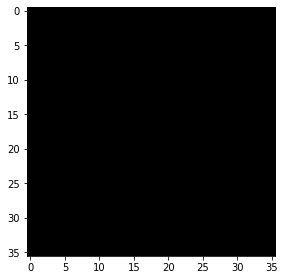

In [ ]:
print(output.shape)
output = torch.from_numpy(output).view(36,36)
output  = output.numpy()
#output = output.squeeze(0)
imshow(output)
print(output)